In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
mentalhealth_data = pd.read_csv('Student Mental Health.csv')

# READ DATASET

In [3]:
mentalhealth_data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [4]:
print(f"Shape of the dataset: {mentalhealth_data}")

Shape of the dataset:                Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                    

In [5]:
print("Summary of The Dataset :")
mentalhealth_data.describe().T.style.set_properties(**{"color":"blue","border": "1.5px  solid black"})

Summary of The Dataset :


,count,mean,std,min,25%,50%,75%,max
Age,100.000000,20.530000,2.496280,18.000000,18.000000,19.000000,23.000000,24.000000


# CLEAN DATASET

In [6]:
mentalhealth_data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
mentalhealth_data.head(1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [7]:
mentalhealth_data.describe(include=object).T.style.set_properties(**{"color":"blue","border": "1.2px  solid black"})

,count,unique,top,freq
Timestamp,101,92,8/7/2020 12:39,3
Gender,101,2,Female,75
Course,101,49,BCS,18
Year,101,7,year 1,41
CGPA,101,6,3.50 - 4.00,47
Marital_Status,101,2,No,85
Depression,101,2,No,66
Anxiety,101,2,No,67
Panic_Attack,101,2,No,68
Treatment,101,2,No,95


Descriptive statistical analysis on categorical data in the "mentalhealth_data" dataset

In [8]:
mentalhealth_data = mentalhealth_data[mentalhealth_data['Age'].notna()]
mentalhealth_data.shape

(100, 11)

This removes all the rows from the Pandas DataFrame `mentalhealth_data` where the value in the "Age" column is missing or NaN. 

The expression `mentalhealth_data['Age'].notna()` returns a boolean mask with the same shape as the "Age" column of the `mentalhealth_data` DataFrame, where each element is `True` if the corresponding value in the "Age" column is not NaN, and `False` otherwise. 

By using this boolean mask as an index for the `mentalhealth_data` DataFrame, the code returns a new DataFrame that only contains the rows where the "Age" column is not missing. The original `mentalhealth_data` DataFrame is not modified.

The `shape` attribute of a Pandas DataFrame returns a tuple that contains the number of rows and columns in the DataFrame. So the second line of code returns the number of rows and columns in the new DataFrame that only contains the rows with non-missing "Age" values.

In [9]:
mentalhealth_data['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [10]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
mentalhealth_data["Year"] = mentalhealth_data["Year"].apply(Clean)
print("First three values of Year after cleaning text:")
print(mentalhealth_data["Year"][:3], "\n")

First three values of Year after cleaning text:
0    1
1    2
2    1
Name: Year, dtype: int64 



# This code takes a string of characters as input, assumes that the last character of that string is a single digit number, and converts it into an integer


This code is essentially cleaning up the "Year" column in the "mentalhealth_data" DataFrame by converting the last character of each string value into an integer. This is done by applying the "Clean" function to each value in the "Year" column. The resulting integer values are then stored back in the "Year" column, replacing the original string values. The last print statement is used to verify that the cleaning operation has been successful by showing the first three values of the "Year" column after cleaning.

In [11]:
mentalhealth_data.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [12]:
mentalhealth_data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

Findings
The CGPA column has ranges rather than an absolute value.
The range '3.50 - 4.00' is same as '3.50 - 4.00 ', so we need to trim the trailing whitespace.
The ranges can be converted to their mean values, but I will keep them as it is for further exploration.

In [13]:
def remove_space(string):
    string = string.strip()
    return string
mentalhealth_data["CGPA"] = mentalhealth_data["CGPA"].apply(remove_space)
print("First three values of CGPA after cleaning text:")
print(mentalhealth_data["CGPA"][:3], "\n")
print(mentalhealth_data['CGPA'].unique())

First three values of CGPA after cleaning text:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


This defines a function called remove_space that removes leading and trailing whitespace characters from a given string and returns the resulting string.

Next, the apply method is used on the "CGPA" column of the "mentalhealth_data" dataset to apply the remove_space function to each value in the column and update the values in place.

Then, the first three values of the "CGPA" column after cleaning are printed, followed by a list of unique values in the "CGPA" column.

The purpose of this code is to remove any leading or trailing whitespace characters from the "CGPA" column in the "mentalhealth_data" dataset to ensure consistency in the data and avoid any potential errors in analysis. The unique method at the end is used to check if the cleaning operation was successful and to display all unique values in the "CGPA" column after cleaning.

In [14]:
len(mentalhealth_data['Course'].unique())

49

In [15]:
#Let's replace redundant course name with the standard course name
mentalhealth_data['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
len(mentalhealth_data['Course'].unique())

37

# DATA ANALYSIS AND VISUALIZATION

# COUNT OF DEPRESSION CASES BY GENDER

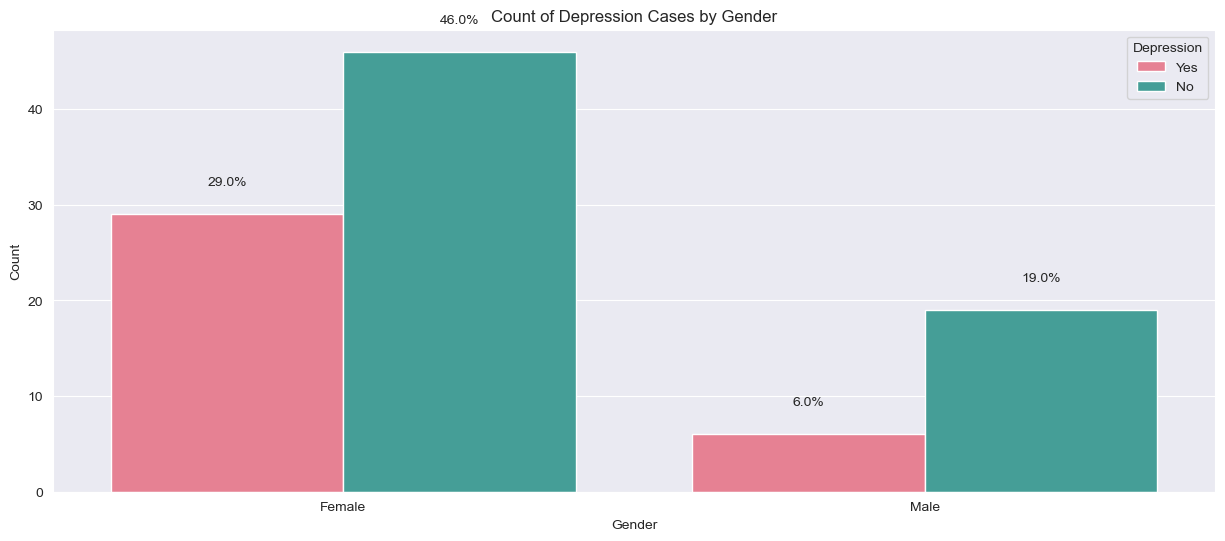

In [16]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")

ax = sns.countplot(x="Gender", hue="Depression", data=mentalhealth_data, palette="husl")
ax.set_title("Count of Depression Cases by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

# Add percentages on top of the bars
total = len(mentalhealth_data["Gender"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center")

plt.show()








# COUNT OF ANXIETY CASES BY GENDER

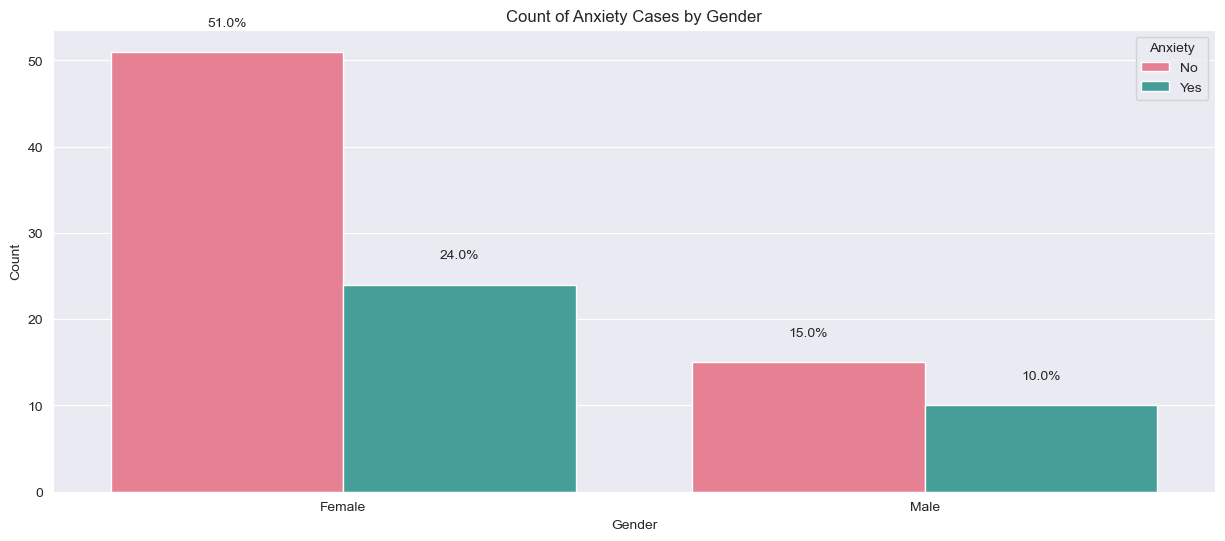

In [17]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")

ax = sns.countplot(x="Gender", hue="Anxiety", data=mentalhealth_data, palette="husl")
ax.set_title("Count of Anxiety Cases by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

# Add percentages on top of the bars
total = len(mentalhealth_data["Gender"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center")

plt.show()


In [18]:
student_count_by_study_year = mentalhealth_data["Year"].value_counts()
student_count_by_study_year

1    42
2    26
3    24
4     8
Name: Year, dtype: int64

# COUNT OF GENDER BY YEAR

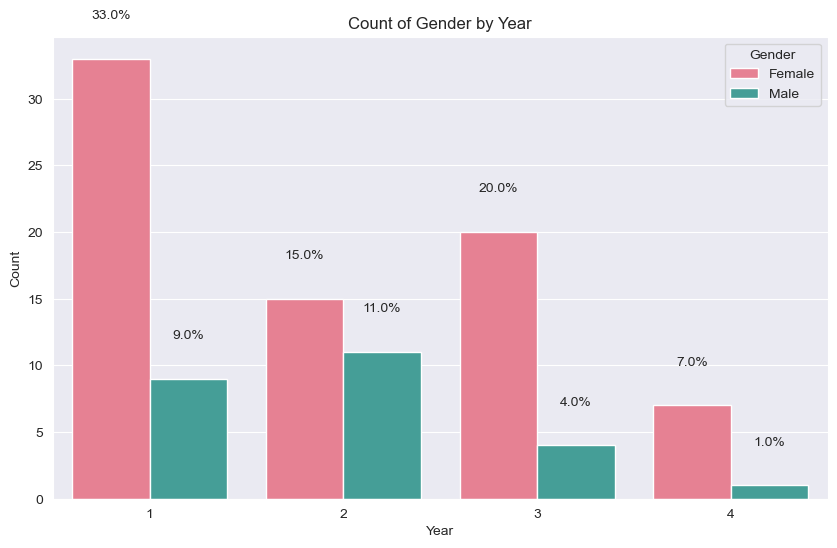

In [19]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

ax = sns.countplot(x="Year", hue="Gender", data=mentalhealth_data, palette="husl")
ax.set_title("Count of Gender by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")

# Add percentages on top of the bars
total = len(mentalhealth_data["Year"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center")

plt.show()


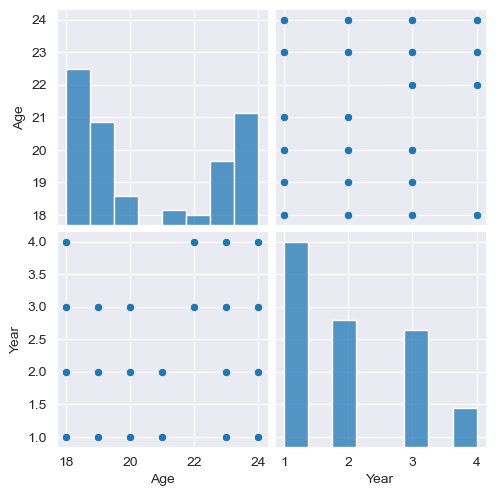

In [20]:
sns.pairplot(mentalhealth_data)

# DISTRIBUTION OF COURSES OF ALL STUDENTS 

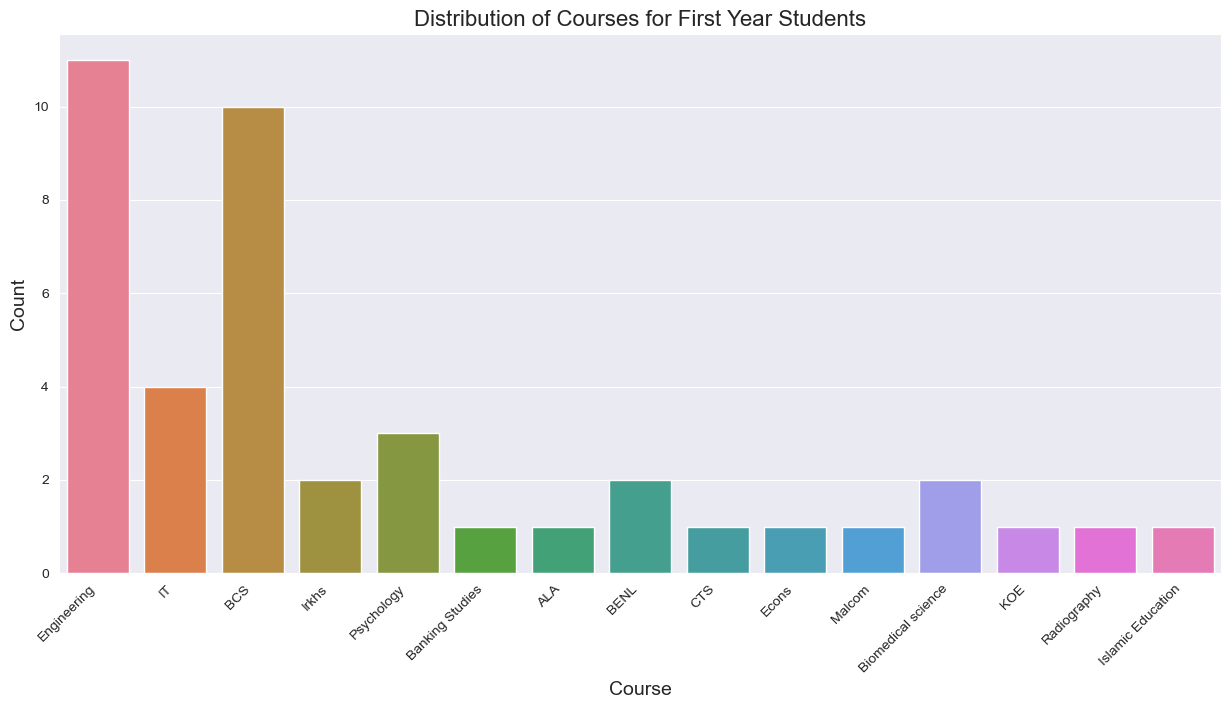

In [21]:
plt.figure(figsize=(15, 7))

filtered_data = mentalhealth_data[mentalhealth_data['Year'] == 1]
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for First Year Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()

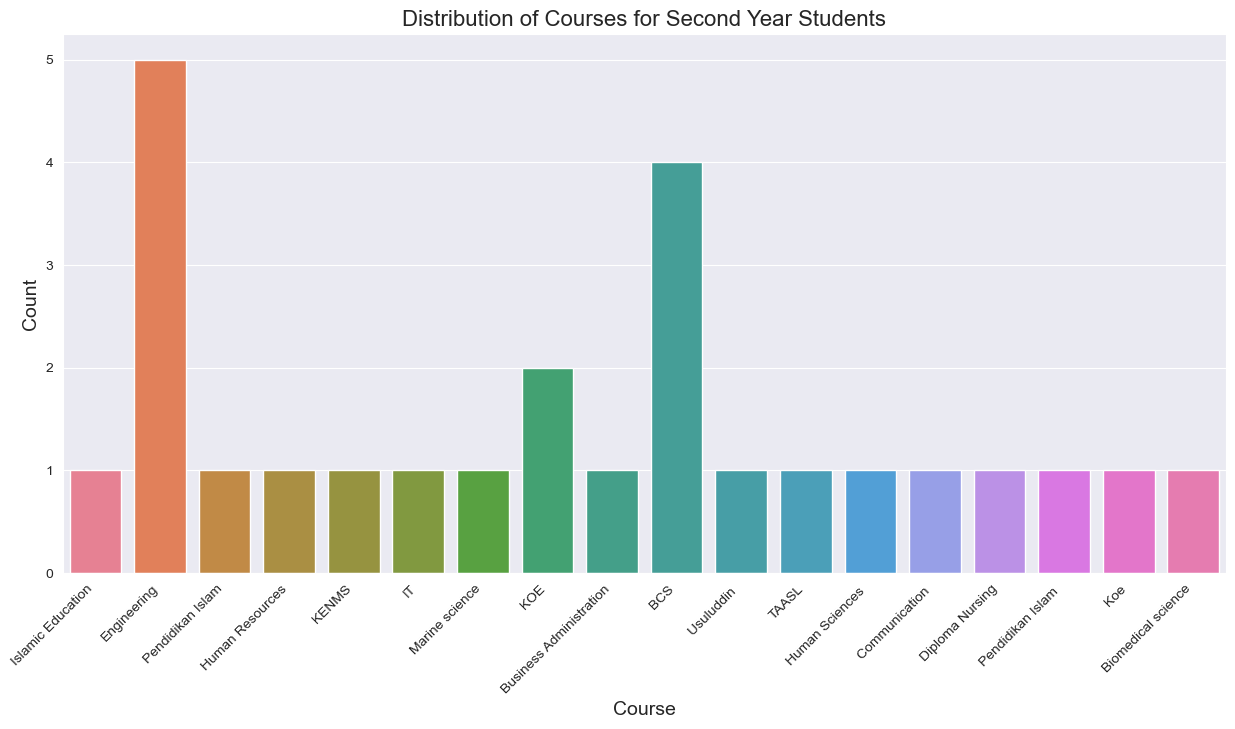

In [22]:
plt.figure(figsize=(15, 7))

filtered_data = mentalhealth_data[mentalhealth_data['Year'] == 2]
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for Second Year Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()

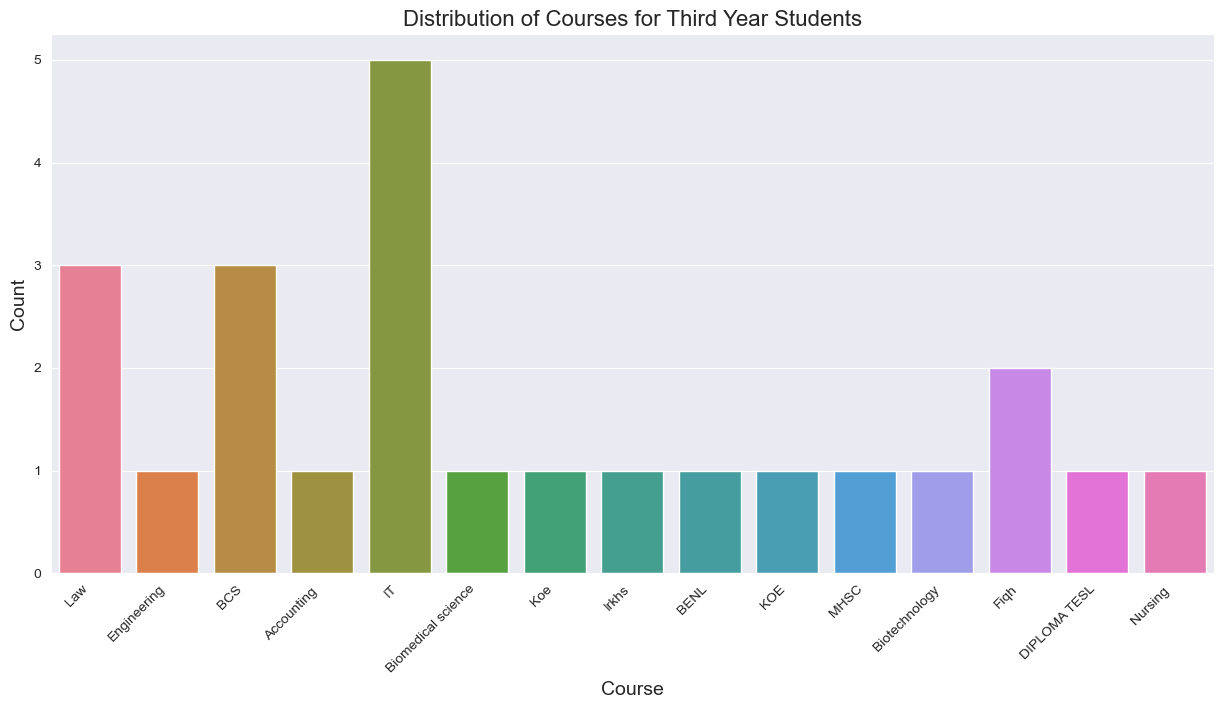

In [23]:
plt.figure(figsize=(15, 7))

filtered_data = mentalhealth_data[mentalhealth_data['Year'] == 3]
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for Third Year Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()

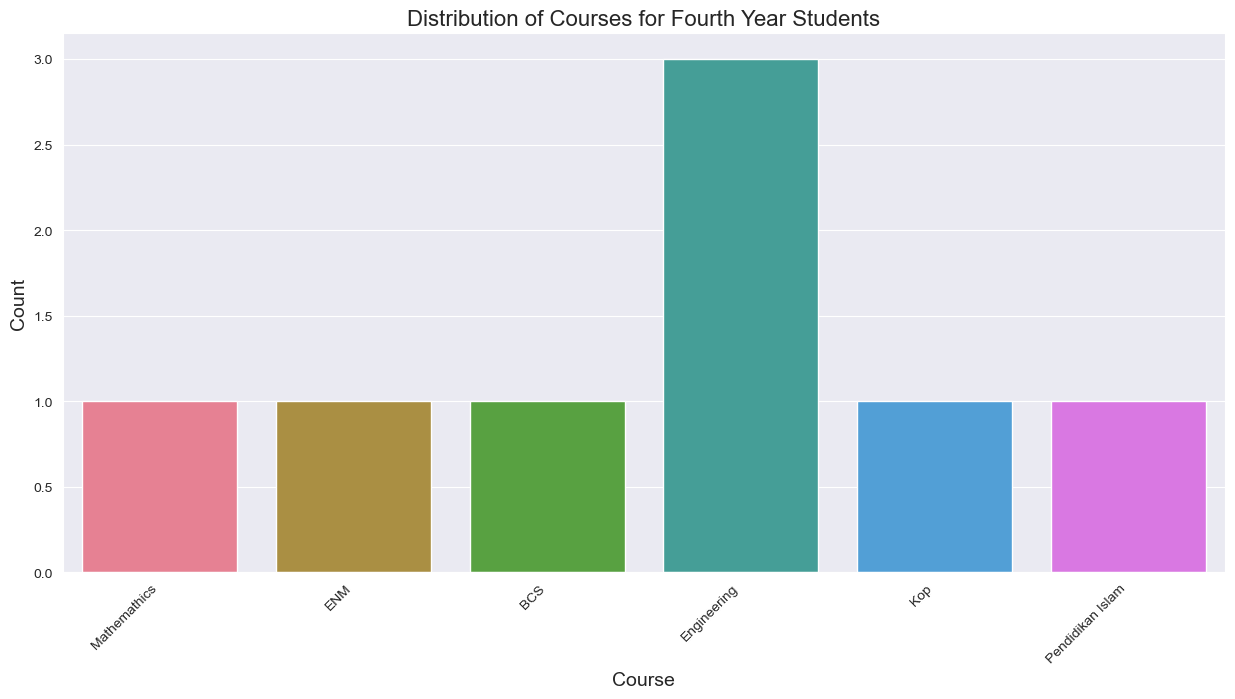

In [24]:
plt.figure(figsize=(15, 7))

filtered_data = mentalhealth_data[mentalhealth_data['Year'] == 4]
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for Fourth Year Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()

# Year-wise analysis of students from different courses
Here are some of the stats:

Maximum students from Year 4 are from Engineering.
Missing Courses from the Year 4 (x-axis) must have a course duration of 3 years.
Engineering, BCS and IT students rule the survey with maximum number of responses.

# NUMBER OF STUDENTS BY STUDY YEAR

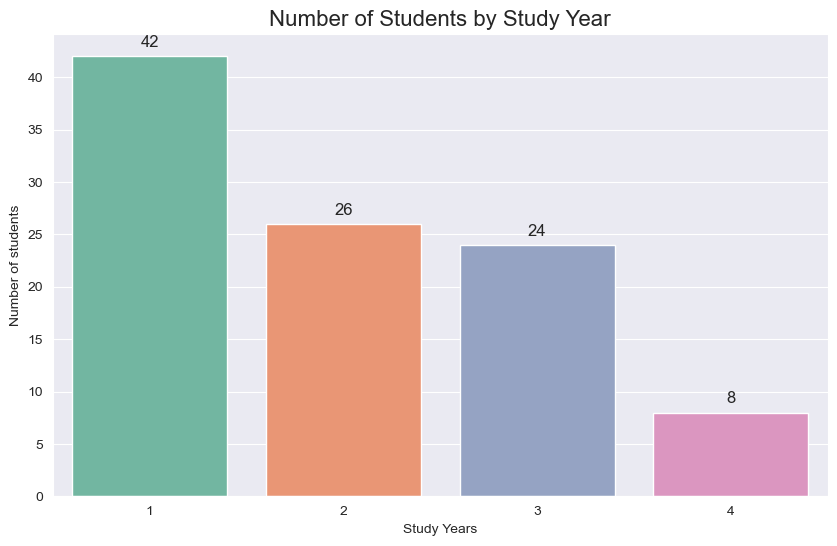

In [27]:
plt.figure(figsize=(10, 6))
student_count_by_study_year_plot = sns.barplot(x=student_count_by_study_year.index, y=student_count_by_study_year, palette='Set2')
student_count_by_study_year_plot.set(xlabel="Study Years", ylabel="Number of students")
student_count_by_study_year_plot.set_title("Number of Students by Study Year", fontsize=16)
for p in student_count_by_study_year_plot.patches:
    student_count_by_study_year_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                                               ha='center', va='center', xytext=(0, 10), 
                                               textcoords='offset points', fontsize=12)
plt.show()


# MENTAL HEALTH ISSUES BY COURSE AND GENDER

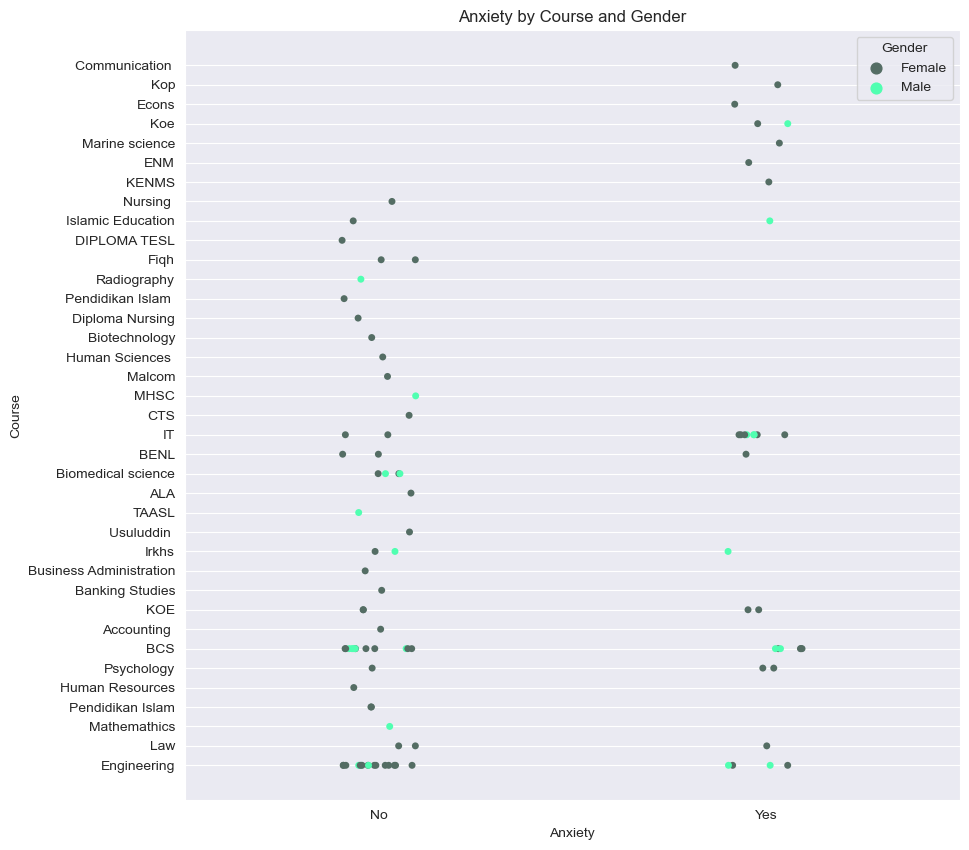

Anxiety vs Course
Here are some of the stats:
Students enrolled in IT experience the maximum anxiety.
Students enrolled in fields related to Islam(Islamic Education, Pendidikan Islam, Fiqh, Usuluddin, etc.) and Biology(Human Sciences, Nursing, Biomedical Sciences) are less prone to anxiety.
Computer Science(BCS) has almost an equal number of students who experience anxiety and those who not.


In [33]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Set the color palette
palette = ['#546D64', '#50FFB1']

# Create a strip plot with the "Anxiety" variable on the x-axis, "Course" variable on the y-axis, and "Gender" variable as hue
sns.stripplot(x='Anxiety', y='Course', hue='Gender', data=mentalhealth_data, palette=palette)

# Add a title to the chart
plt.title('Anxiety by Course and Gender')

# Add a label to the x-axis
plt.xlabel('Anxiety')

# Add a label to the y-axis
plt.ylabel('Course')

# Add a legend to the chart
plt.legend(title='Gender')

# Show the chart
plt.show()

print("Anxiety vs Course\nHere are some of the stats:\nStudents enrolled in IT experience the maximum anxiety.\nStudents enrolled in fields related to Islam(Islamic Education, Pendidikan Islam, Fiqh, Usuluddin, etc.) and Biology(Human Sciences, Nursing, Biomedical Sciences) are less prone to anxiety.\nComputer Science(BCS) has almost an equal number of students who experience anxiety and those who not.")


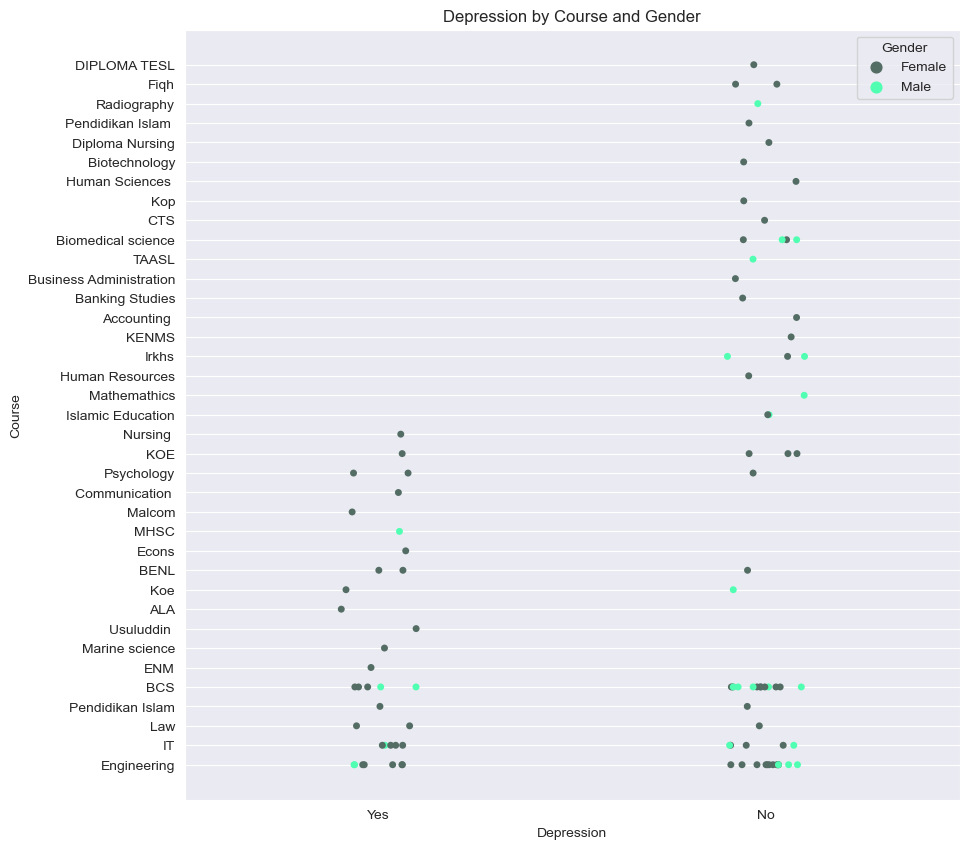

Depression vs Course
Here are some of the stats:
Males are less prone to experiencing depression as compared to females.
2/3 females in Psychology experience depression,... Strange!
Around 50% of the Students in IT experience depression.


In [35]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Set the color palette
palette = ['#546D64', '#50FFB1']

# Create a strip plot with the "Anxiety" variable on the x-axis, "Course" variable on the y-axis, and "Gender" variable as hue
sns.stripplot(x='Depression', y='Course', hue='Gender', data=mentalhealth_data, palette=palette)

# Add a title to the chart
plt.title('Depression by Course and Gender')

# Add a label to the x-axis
plt.xlabel('Depression')

# Add a label to the y-axis
plt.ylabel('Course')

# Add a legend to the chart
plt.legend(title='Gender')

# Show the chart
plt.show()

print("Depression vs Course\nHere are some of the stats:\nMales are less prone to experiencing depression as compared to females.\n2/3 females in Psychology experience depression,... Strange!\nAround 50% of the Students in IT experience depression.")


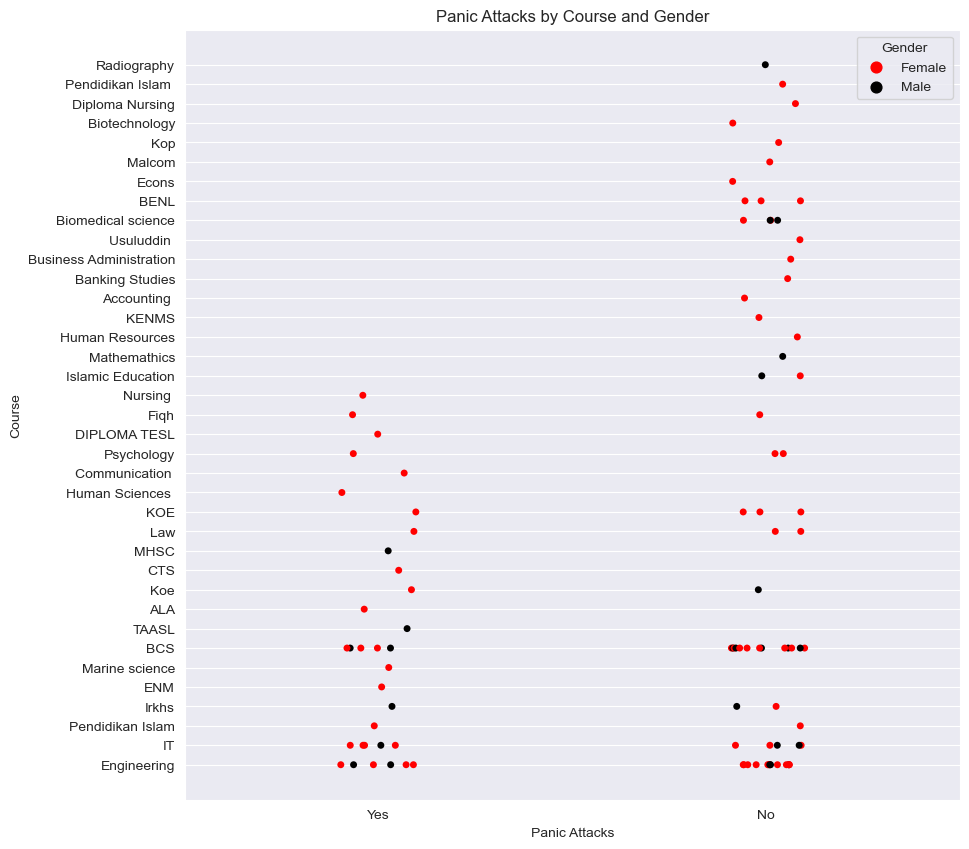

Panic Attack vs Course
Here are some of the stats:
Males are less prone to experiencing panic attacks as compared to females.
Approximately 37.5% of Engineering students experience panic attacks.
About 62.5% of IT students experience panic attacks.
About 18% of BCS students experience panic attacks.


In [38]:
plt.figure(figsize=(10, 10))

# Set the color palette
palette = ['red', 'black']

# Create a strip plot with the "Anxiety" variable on the x-axis, "Course" variable on the y-axis, and "Gender" variable as hue
sns.stripplot(x='Panic_Attack', y='Course', hue='Gender', data=mentalhealth_data, palette=palette)

# Add a title to the chart
plt.title('Panic Attacks by Course and Gender')

# Add a label to the x-axis
plt.xlabel('Panic Attacks')

# Add a label to the y-axis
plt.ylabel('Course')

# Add a legend to the chart
plt.legend(title='Gender')

# Show the chart
plt.show()

print("Panic Attack vs Course\nHere are some of the stats:\nMales are less prone to experiencing panic attacks as compared to females.\nApproximately 37.5% of Engineering students experience panic attacks.\nAbout 62.5% of IT students experience panic attacks.\nAbout 18% of BCS students experience panic attacks.")


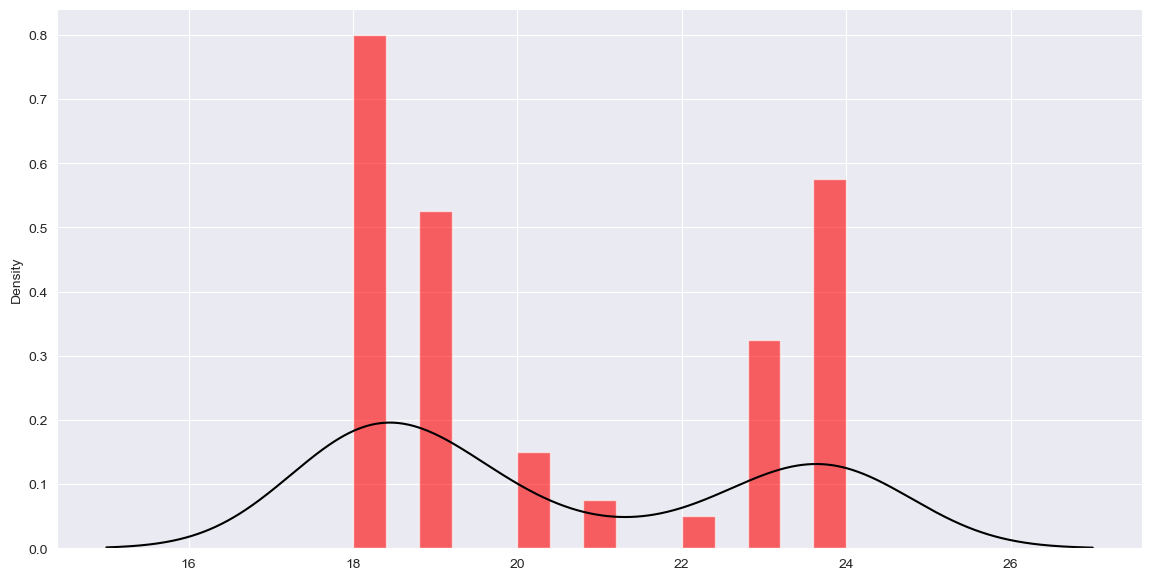

In [39]:
plt.figure(figsize=(14,7))
ax = mentalhealth_data["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
mentalhealth_data["Age"].plot(kind='density', color='black')
plt.show()

# Let's analyse various parameters(Depression, Anxiety, Panic_Attack) yearwise.

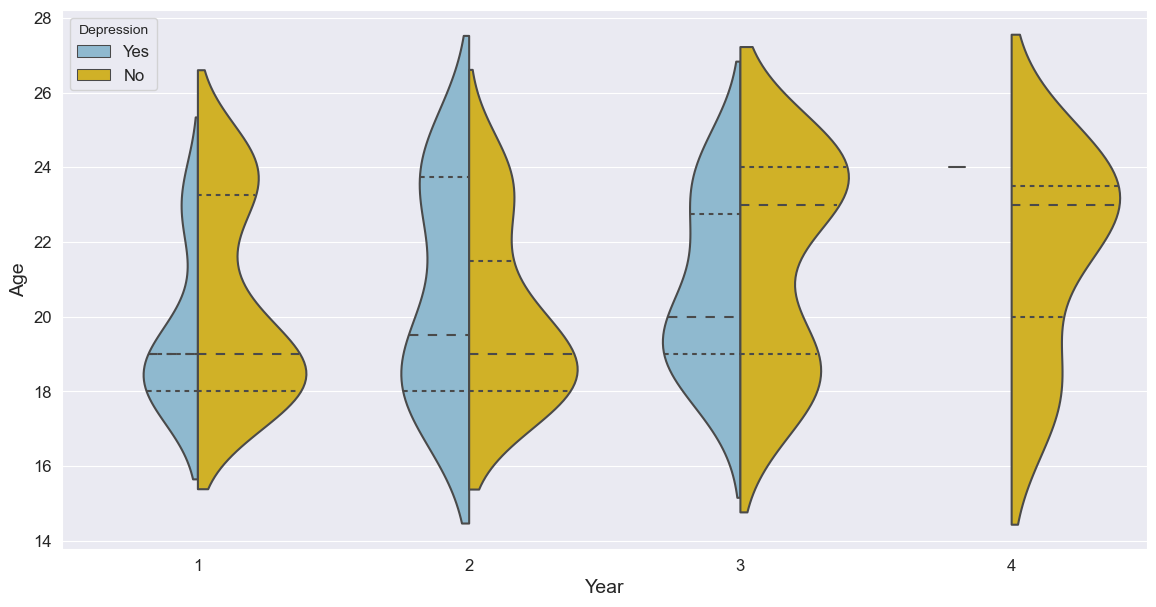

In [45]:
plt.figure(figsize=(14,7))
sns.violinplot(x='Year', y='Age', data=mentalhealth_data, hue='Depression', palette=['#84BCDA', '#ECC30B'], split=True, scale='count', inner='quartile')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Depression', fontsize=12, loc='upper left')
plt.show()


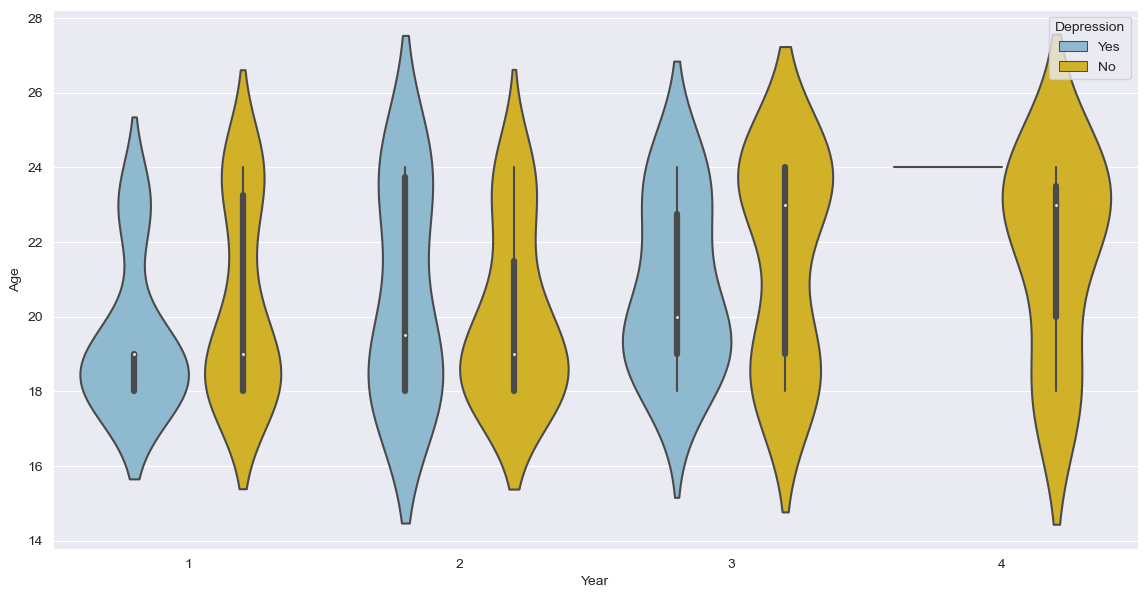

In [41]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = mentalhealth_data,  hue = 'Depression', palette = ['#84BCDA', '#ECC30B'])
plt.show()

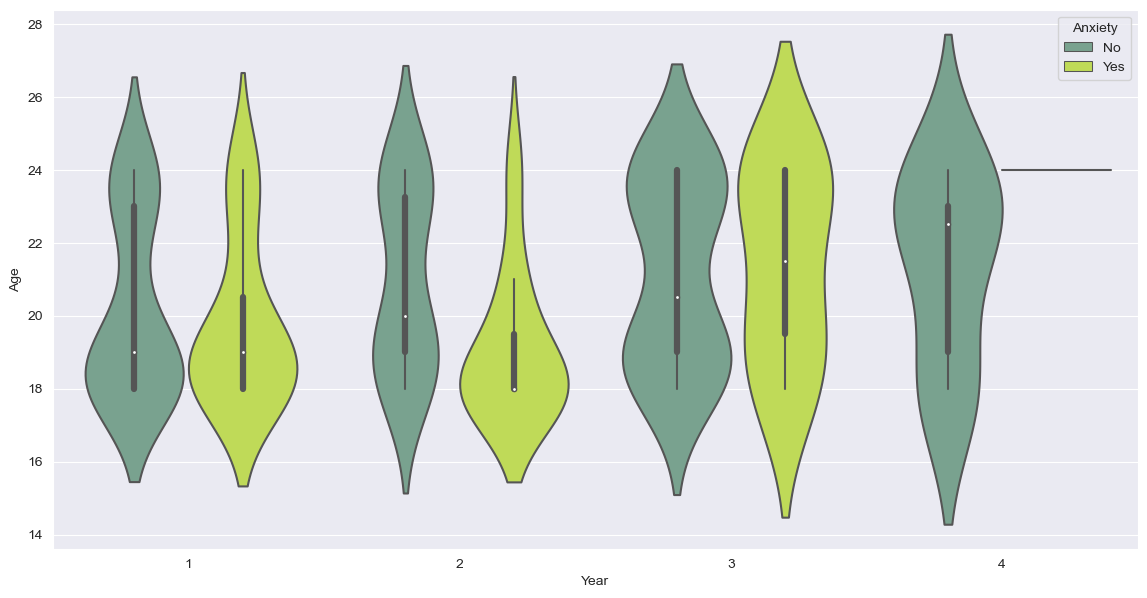

In [46]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = mentalhealth_data,  hue = 'Anxiety', palette = ['#72A98F', '#CBEF43'])
plt.show()

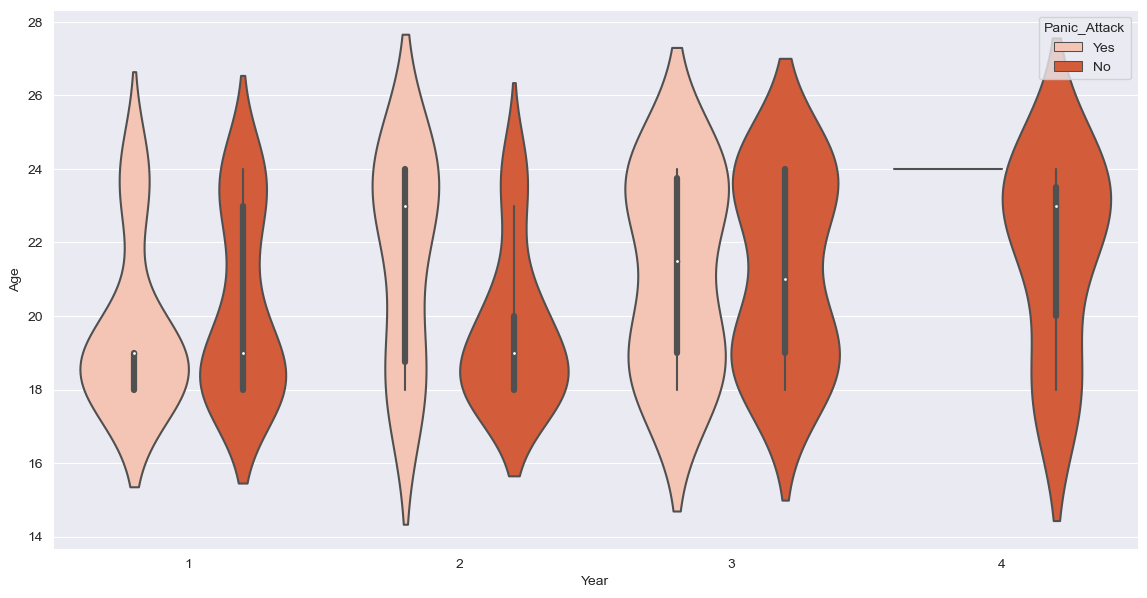

In [47]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Age', data = mentalhealth_data,  hue = 'Panic_Attack', palette = ['#FEC0AA', '#EC4E20'])
plt.show()

# Analysis to checck whether CGPA has any correlation with a student's mental health

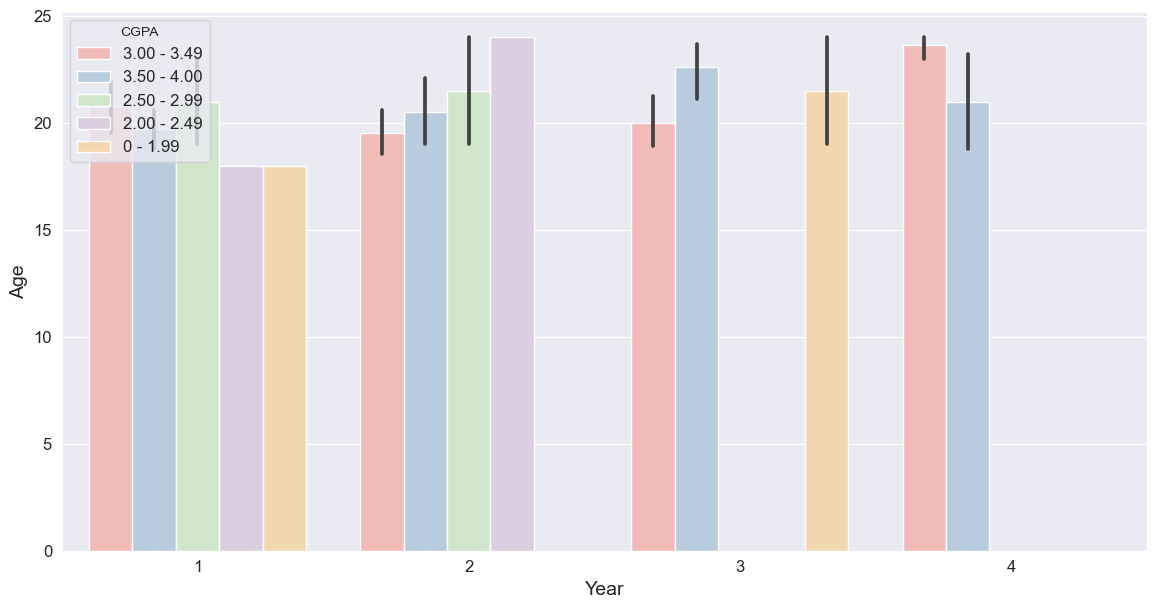

In [51]:
plt.figure(figsize=(14,7))
sns.barplot(data=mentalhealth_data, x='Year', y='Age', hue='CGPA', palette='Pastel1')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='CGPA', fontsize=12, loc='upper left')
plt.show()

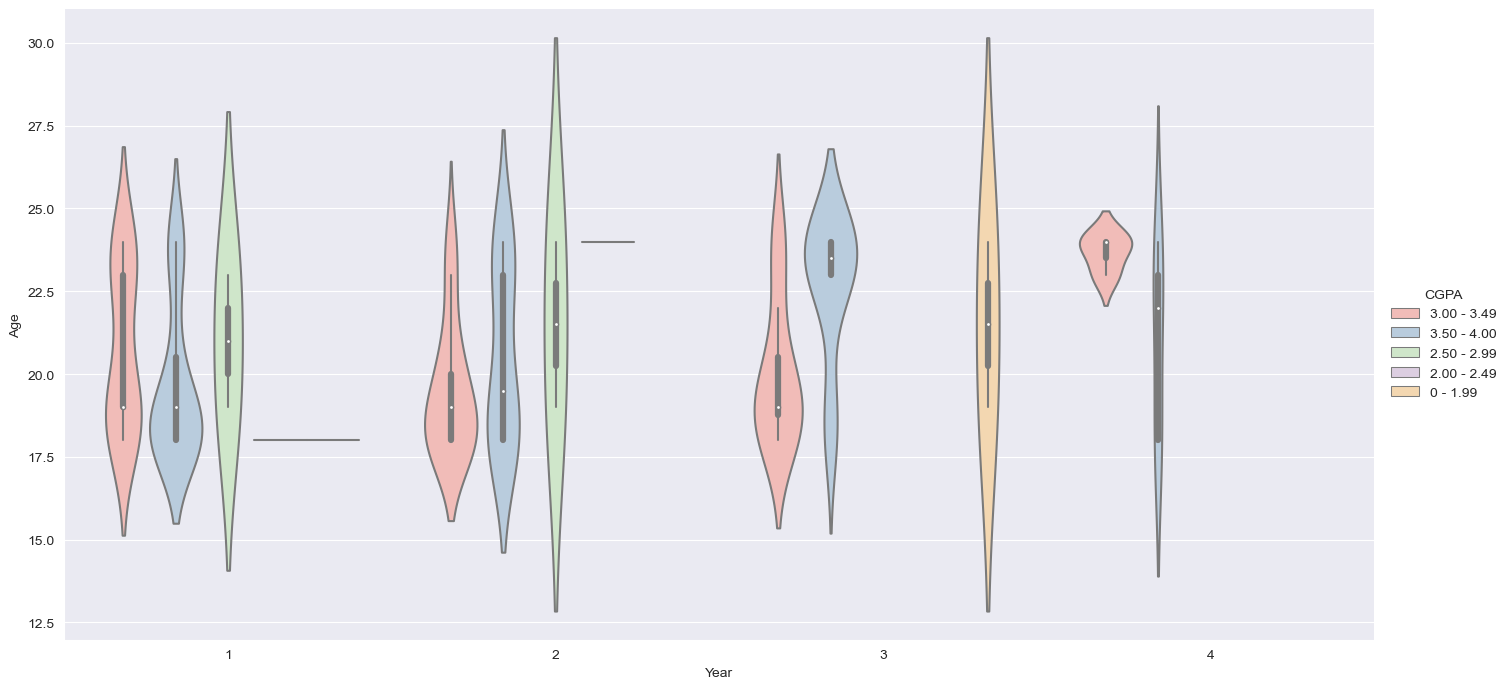

In [55]:
sns.catplot (data= mentalhealth_data, x = 'Year', y = 'Age', hue = 'CGPA', kind="violin", palette="Pastel1",height=7,aspect=2)

<AxesSubplot:>

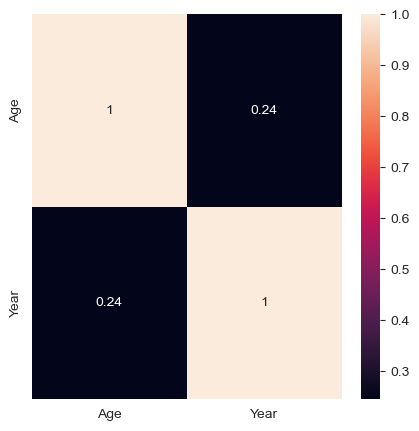

In [52]:
corrmat= mentalhealth_data.corr()
plt.figure(figsize=(5,5))  
sns.heatmap(corrmat,annot=True, cmap=None)

In [28]:
filter1 = mentalhealth_data["Anxiety"] == "Yes"


In [29]:
mentalhealth_data1 = mentalhealth_data[filter1].groupby("Year")['Anxiety'].count() / mentalhealth_data.groupby("Year")['Anxiety'].count() * 100

In [30]:
mentalhealth_data2 = 100 - mentalhealth_data1
mentalhealth_data2

Year
1    66.666667
2    61.538462
3    66.666667
4    75.000000
Name: Anxiety, dtype: float64

In [31]:
combine_mentalhealth_data = pd.concat([mentalhealth_data1, mentalhealth_data2],axis=1)
combine_mentalhealth_data.columns = ["Yes", "No"]
combine_mentalhealth_data

,Yes,No
Year,,
1,33.333333,66.666667
2,38.461538,61.538462
3,33.333333,66.666667
4,25.000000,75.000000


<Figure size 1200x800 with 0 Axes>

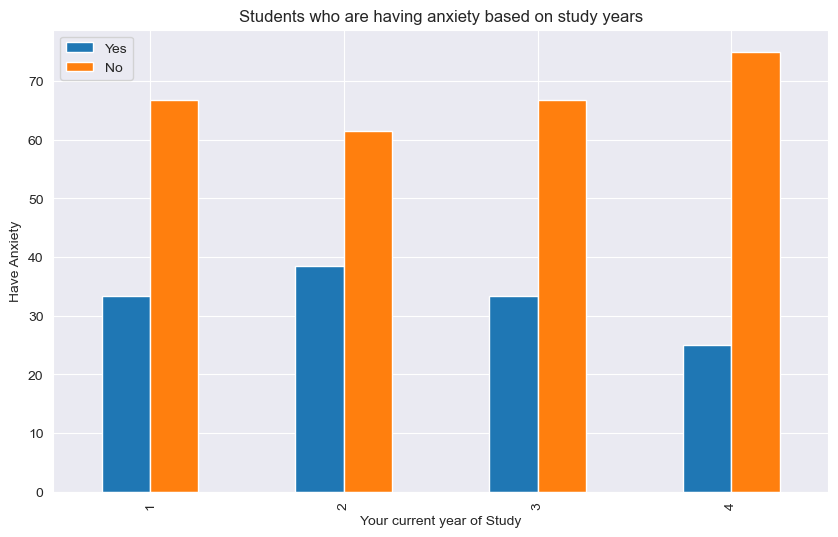

In [32]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = combine_mentalhealth_data.plot(kind='bar', figsize=(10,6), xlabel="Your current year of Study", ylabel="Have Anxiety", title="Students who are having anxiety based on study years")
plt.show()